Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as tn
from torch import flatten as flatten
from torch.optim import Adam as Adam
from torch.nn import CrossEntropyLoss as CrossEntropyLoss
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import permutation
from statistics import mean

Read the dataset

In [2]:
# Import the dataset
url = "https://drive.google.com/uc?export=download&id=10ZZLHTUVC5N8diC7p76puSUWe8rdwo8z"

def import_dataset(url):
  mnist_dataset = pd.read_csv(url)
  return mnist_dataset

print(f"Shape of MNIST dataset is {import_dataset(url).shape}")
import_dataset(url)

Shape of MNIST dataset is (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plot label

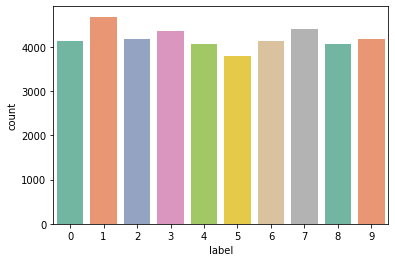

In [3]:
# Plot label and their count
sns.countplot(x = 'label', palette = "Set2", data=(import_dataset(url)))

Split dataset

In [4]:
# Size of the split
trainsize = 0.9
testsize = 0.1

# Remove the label from x and assign label to y
# x has values and y has labels

y = import_dataset(url)['label']
x = import_dataset(url).drop(labels = 'label', axis = 1)

# Split the dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = trainsize, test_size = testsize, shuffle = True, random_state=20)

In [5]:
# Convert X_train and X_test to tensor as floating values
X_train = torch.tensor(X_train.values).float()
X_test = torch.tensor(X_test.values).float()

#Convert y_train and y_test to tensor
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

# Print the values of X_train, X_test, y_train, y_test after conversion
print(f"X_train: {X_train}\n")
print(f"X_test: {X_test}\n")
print(f"y_train: {y_train}\n")
print(f"y_test: {y_test}")

X_train: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

X_test: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

y_train: tensor([3, 9, 9,  ..., 2, 5, 6])

y_test: tensor([2, 6, 4,  ..., 1, 1, 9])


Reshape X_train and X_test

In [6]:
# Reshape X_train
X_train = X_train.reshape(-1, 1, 28, 28)

# Reshape X_test
X_test = X_test.reshape(-1, 1, 28, 28) 

Plot some digits

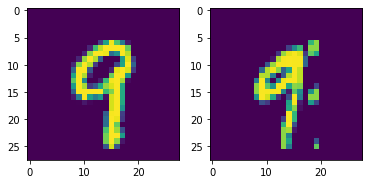

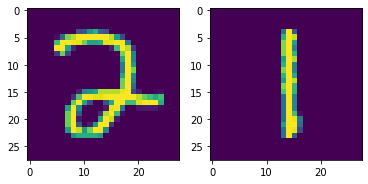

In [7]:
# Plot some figures using matplotlib

# Plot first figure in first row and first column
plt.subplot(1,2,1)

# Reshape first figure
plt.imshow(X_train[1][0])

# Plot second figure in first row and second column
plt.subplot(1,2,2)

# Reshape second figure
plt.imshow(X_train[2][0])

# Show second figure
plt.show()

# plot third figure in second row
plt.subplot(1,2, 1)

# Reshape third figure
plt.imshow(X_train[3][0])

# Plot fourth figure in second row and second column
plt.subplot(1,2, 2)

# Reshape fourth figure
plt.imshow(X_train[4][0])

# Show the fourth figure
plt.show()

Implement LeNet-5

In [8]:
# Inherit base class (torch.nn.Module) for building a neural network which contains methods that we require
class Lenet5(tn.Module):
  # In init function below we design the model
  def __init__(self): # Define a class constructor wherein whatever we define will be available to each instance of a class
    super(Lenet5, self).__init__() # Subclass of (torch.nn.Module) which inherits all methods
    self.convolution1 = tn.Conv2d(1, 6, 5, padding =2) # First convolution layer with 1 input channel, 6 output channels, 5 kernel size and padding of 2
    self.activationfunction1 = tn.Tanh() # First activation function Tanh which takes input as a real value and provides output in the range of -1 to 1
    self.averagepooling1 = tn.AvgPool2d(2) # First average pooling layer with the kernel size of 2
    self.convolution2 = tn.Conv2d(6, 16, 5, padding =0) # Second convolution layer with 6 input channels, 16 output channels, 5 kernel size and padding of 0
    self.activationfunction2 = tn.Tanh() # Second activation function Tanh which takes input as a real value and provides output in the range of -1 to 1
    self.averagepooling2 = tn.AvgPool2d(2) # Second average pooling layer with the kernel size of 2
    self.convolution3 = tn.Conv2d(16, 120, 5, padding =0) # Third convolution layer with 16 input channels, 120 output channels, 5 kernel size and padding of 0
    self.activationfunction2 = tn.Tanh() # Third activation function Tanh which takes input as a real value and provides output in the range of -1 to 1
    self.fullyconnected1 = tn.Linear(120, 84) # First fully connected layer where we are applying linear transformation to the incoming data which has input size of 120 and output size of 84
    self.activationfunction3 = tn.Tanh() # Third activation function Tanh which takes input as a real value and provides output in the range of -1 to 1
    self.fullyconnected2 = tn.Linear(84, 10) # Second fully connected layer where we are applying linear transformation to the incoming data which has input size of 84 and output size of 10
    # After the second fully connected layer there has to be a softmax function but are not adding it here as we are already putting it in the loss function
    # Last layer has 10 output neurons which is the prediction for the digits

  
  def forward(self, x):
    # In forward function we specify the flow of data i.e. sequence in which layers will process the image provided
    x = self.convolution1(x)
    x = self.activationfunction1(x)
    x = self.averagepooling1(x)
    x = self.convolution2(x)
    x = self.activationfunction2(x)
    x = self.averagepooling2(x)
    x = self.convolution3(x)
    x = self.activationfunction2(x)
    x = flatten(x, 1) # (torch.flatten) flattens or reshapes the input into a one dimensional tensor, since we gave it as 1 it will start flattening from second dimension
    # After flattening we move to fc layers 
    x = self.fullyconnected1(x)
    x = self.activationfunction3(x)
    x = self.fullyconnected2(x)
    return x

Implementing batch wise gradient descent

In [9]:
class_lenet5 = Lenet5()
batchsize = 64
epoch_value = 10
learningrate = 0.001
length_X_train = len(X_train)
accuracy_value = []

# Training neural network with training data for different epochs
for epoch in range(epoch_value):
  shuffle = permutation(length_X_train) # Randomly shuffle the dataset
  for every_index in range(0, length_X_train, batchsize):
    Adam(class_lenet5.parameters(), lr=learningrate).zero_grad() # Adam optimizer along with zero grad to reset the gradient as 0 before each iteration as gradients will be summed later(if we will not do this then the loss will increase not decrease)
    X_train_shuffle = X_train[shuffle[every_index:every_index + batchsize]] # Randomly shuffled data of X_train is stored as a batch
    y_train_shuffle = y_train[shuffle[every_index:every_index + batchsize]] # Randomly shuffled data of X_train is stored as a batch
    prediction_class = class_lenet5.forward(X_train_shuffle) # Run data through neural network to get class predictions
    loss = CrossEntropyLoss() # Define loss function(In pytorch it internally computes softmax)
    loss(prediction_class, y_train_shuffle).backward()  # Cross entropy loss which has softmax to find the loss and compute gradient of loss
    print(f"Epoch: {epoch} , loss: {loss(prediction_class, y_train_shuffle)}")
    

    Adam(class_lenet5.parameters(), lr=learningrate).step() # Update the weights

  # Prediction on test data
  test_prediction = class_lenet5.forward(X_test)

  # Calculate accuracy on test data
  max_probability = torch.argmax(test_prediction, dim=1) # Returns largest predicted probability
  compare_values = max_probability == y_test # Compare both tensor values
  accuracy = torch.mean(compare_values.float()) # Find the mean accuracy

  accuracy_value.append(float(accuracy)*100)

Streaming output truncated to the last 5000 lines.
Epoch: 1 , loss: 0.029790963977575302
Epoch: 1 , loss: 0.0698300302028656
Epoch: 1 , loss: 0.11751694232225418
Epoch: 1 , loss: 0.07499450445175171
Epoch: 1 , loss: 0.05533076077699661
Epoch: 1 , loss: 0.11895854026079178
Epoch: 1 , loss: 0.18134118616580963
Epoch: 1 , loss: 0.08601836115121841
Epoch: 1 , loss: 0.041360531002283096
Epoch: 1 , loss: 0.2158806324005127
Epoch: 1 , loss: 0.07363715022802353
Epoch: 1 , loss: 0.04205302149057388
Epoch: 1 , loss: 0.04507385194301605
Epoch: 1 , loss: 0.11009644716978073
Epoch: 1 , loss: 0.04152645543217659
Epoch: 1 , loss: 0.05754854157567024
Epoch: 1 , loss: 0.05908648669719696
Epoch: 1 , loss: 0.02858061157166958
Epoch: 1 , loss: 0.1396513730287552
Epoch: 1 , loss: 0.1315062791109085
Epoch: 1 , loss: 0.012036187574267387
Epoch: 1 , loss: 0.013237616047263145
Epoch: 1 , loss: 0.018762314692139626
Epoch: 1 , loss: 0.030035989359021187
Epoch: 1 , loss: 0.08028335124254227
Epoch: 1 , loss: 0.023

Show accuracy

In [10]:
# Print accuracy values
p = 0
for i in range(len(accuracy_value)):
  print(f"\nAccuracy percentage for Epoch {p} is:", accuracy_value[i])
  p = p+1

print("\nMinimum accuracy percentage for digits:", min(accuracy_value)) # Minimum accuracy for digits
print("\nMaximum accuracy percentage for digits:", max(accuracy_value)) # Maximum accuracy for digits
print("\nAverage accuracy percentage for digits:", mean(accuracy_value)) # Final accuracy for all the digits


Accuracy percentage for Epoch 0 is: 95.95237970352173

Accuracy percentage for Epoch 1 is: 97.14285731315613

Accuracy percentage for Epoch 2 is: 97.09523916244507

Accuracy percentage for Epoch 3 is: 97.76190519332886

Accuracy percentage for Epoch 4 is: 98.02380800247192

Accuracy percentage for Epoch 5 is: 98.16666841506958

Accuracy percentage for Epoch 6 is: 97.97618985176086

Accuracy percentage for Epoch 7 is: 97.85714149475098

Accuracy percentage for Epoch 8 is: 98.19047451019287

Accuracy percentage for Epoch 9 is: 98.19047451019287

Minimum accuracy percentage for digits: 95.95237970352173

Maximum accuracy percentage for digits: 98.19047451019287

Average accuracy percentage for digits: 97.63571381568909


Plot accuracies

<BarContainer object of 10 artists>

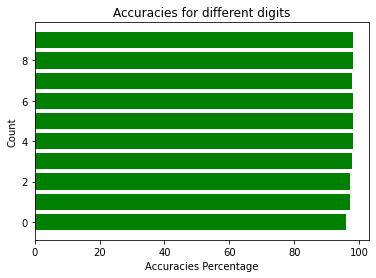

In [11]:
plt.title("Accuracies for different digits")
plt.xlabel("Accuracies Percentage")
plt.ylabel("Count")
plt.barh(list(range(0, len(accuracy_value))), accuracy_value, color='green')